# Exercise: XGBoost

In this exercise, we'll be exploring XGBoost and leveraging it on the same
regression and classification problem as `Exercise: Linear Models`. This is
useful as when are you faced with a new challenge, you often try many different
models to see how they each perform on your problem space. XGBoost can be tuned
in many different ways, so we'll stick with some of the simpler defaults.

You're tasked with completing the following steps:

1. Load in the wine dataset from Scikit Learn.
2. For the wine dataset, create a train and test split, 80% train / 20% test.
3. Load the train/test data into the XGBoost matrix.
4. Create a XGBoost Classifier model with these hyper parameters:
    1. `max_depth`: `5`
    2. `eta`: `0.1`
    3. `objective`: `multi:softmax`
    4. `num_class`: `3`
    5. `num_round`: `100`
5. Evaluate the model with the test dataset.
6. Output the feature importance of the wine dataset.
7. Load the diabetes dataset from Scikit Learn.
8. For the diabetes dataset, create a train and test split, 80% train / 20% test.
9. Load the train/test data into the XGBoost matrix.
10. Create a XGBoost Regression model model with these hyper parameters:
    1. `max_depth`: `2`
    2. `eta`: `0.03`
    3. `gamma`: `0.09`
    4. `colsample_bytree`: `0.5`
    5. `objective`: `reg:squarederror`
    6. `num_round`: `100`
11. Evaluate the model with the test dataset.
12. Output the feature importance of the diabetes dataset.

## Setup

### Open up Sagemaker Studio

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernel: `Python 3 (Data Science)`

In [ ]:
# XGBoost is not preinstalled so we'll need to install it manually
!pip install xgboost

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn import datasets
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split

## XGBoost Classifier

In [2]:
# Load in the wine dataset
wine = datasets.load_wine()

In [3]:
# Create the wine `data` dataset as a dataframe and name the columns with
# `feature_names`
df = pd.DataFrame(wine["data"], columns=wine["feature_names"])

# Include the target as well
df["target"] = wine["target"]

In [4]:
# Split your data with these ratios: train: 0.8 | test: 0.2
df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

In [5]:
# Load your train/test dataframe into DMatrix
dtrain = xgb.DMatrix(df_train.drop(["target"], axis=1), label=df_train["target"])
dtest = xgb.DMatrix(df_test.drop(["target"], axis=1), label=df_test["target"])

In [6]:
# How does the model perform on the training dataset and default model
# parameters? Using the hyperparameters in the requirements, is there
# improvement? Remember we use the test dataset to score the model.
param = {"max_depth": 5, "eta": 1, "objective": "multi:softmax", "num_class": 3}
num_round=100
bst = xgb.train(param, dtrain, num_round)

[17:48:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [7]:
# XGBoost is not Scikit Learn, so you'll need to do predictions using their API
preds = bst.predict(dtest)

In [8]:
# Accuracy score using Scikit Learn function for classification metric
accuracy_score(df_test["target"], preds)

0.9444444444444444

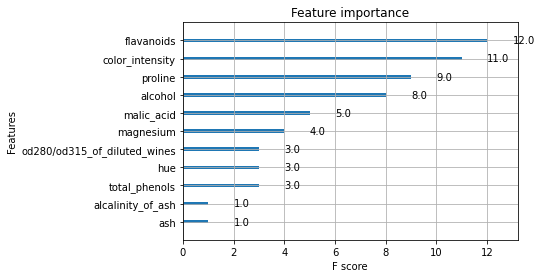

In [9]:
# Plot the importance of the features based on fitted trees
xgb.plot_importance(bst);

## XGBoost Regression

In [10]:
# Load in the diabetes dataset
diabetes = datasets.load_diabetes()

In [11]:
# Create the diabetes `data` dataset as a dataframe and name the columns with
# `feature_names`
dfd = pd.DataFrame(diabetes["data"], columns=diabetes["feature_names"])

# Include the target as well
dfd["target"] = diabetes["target"]

In [12]:
# Split your data with these ratios: train: 0.8 | test: 0.2
dfd_train, dfd_test = train_test_split(dfd, test_size=0.2, random_state=0)

In [13]:
# Load your train/test dataframe into DMatrix
dtrain = xgb.DMatrix(dfd_train.drop(["target"], axis=1), dfd_train["target"])
dtest = xgb.DMatrix(dfd_test.drop(["target"], axis=1), dfd_test["target"])

In [14]:
# How does the model perform on the training dataset and default model
# parameters? Using the hyperparameters in the requirements, is there
# improvement? Remember we use the test dataset to score the model.
param = {"max_depth": 2, "eta": 0.03, "gamma": 0.09, "colsample_bytree": 0.5, "objective": "reg:squarederror"}
num_round=100
bst = xgb.train(param, dtrain, num_round)

In [15]:
# XGBoost is not Scikit Learn, so you'll need to do predictions using their API
preds = bst.predict(dtest)

In [16]:
# R2 score using Scikit Learn function for regression metric
r2_score(dfd_test["target"], preds)

0.32920867717684965

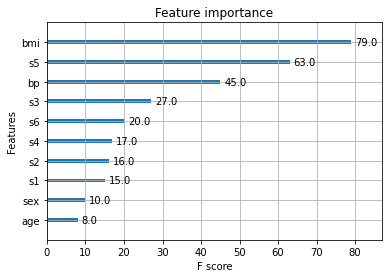

In [17]:
# Plot the importance of the features based on fitted trees
xgb.plot_importance(bst);